In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

mouse_data.columns
# Combine the data into a single dataset
data_complete=pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()
data_complete.columns
data_complete=data_complete[["Mouse ID", "Timepoint", "Tumor Volume (mm3)",
                            "Metastatic Sites", "Drug"]]
data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [2]:
#data_complete["Drug"].value_counts()
#data_complete["Timepoint"].value_counts()
tumor_volume=data_complete.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol=tumor_volume.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().to_frame()

# Convert to DataFrame
mean_df=pd.DataFrame(mean_tumor_vol.loc[:,["Tumor Volume (mm3)"]])

# Preview DataFrame
mean_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
from scipy.stats import sem

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_vol=tumor_volume.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().to_frame()
# Convert to DataFrame
stderr_df=pd.DataFrame(stderr_tumor_vol.loc[:,["Tumor Volume (mm3)"]])
# Preview DataFrame
stderr_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
means=mean_df.unstack(0)
means_df=means["Tumor Volume (mm3)"] #goes down a level
stderr=stderr_df.unstack(0)
stderr_df=stderr["Tumor Volume (mm3)"] #goes down a level

# Preview that Reformatting worked
means_df
stderr_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
means.index #x axis
means.columns.get_level_values(1) #each drug column
#we want drugs Capomulin, Infubinol, Ketapril, Placebo
#plt.errorbar(x,y, yerr=error, fmt="marker") 
#error is your standard error for each drug
#markers are o ^ s d

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

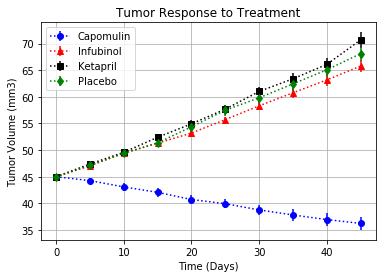

<Figure size 432x288 with 0 Axes>

In [7]:
x_axis = means.index
plt.figure()


# Generate the Plot (with Error Bars)
error = stderr["Tumor Volume (mm3)"]["Capomulin"]
c=plt.errorbar(x_axis, means_df["Capomulin"], yerr=error, fmt="o", ls="dotted", color="blue")

error = stderr["Tumor Volume (mm3)"]["Infubinol"]
i=plt.errorbar(x_axis, means_df["Infubinol"], yerr=error, fmt="^", ls="dotted", color="red")

error = stderr["Tumor Volume (mm3)"]["Ketapril"]
k=plt.errorbar(x_axis, means_df["Ketapril"], yerr=error, fmt="s", ls="dotted", color="black")

error = stderr["Tumor Volume (mm3)"]["Placebo"]
p=plt.errorbar(x_axis, means_df["Placebo"], yerr=error, fmt="d", ls="dotted", color="green")


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="-")
plt.legend((c,i,k,p),("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

# Save the Figure
plt.savefig("tumor_response.jpg")


Observations: The placebo and drugs Infabinol and Ketapril resulted in increasing tumor growth over time. Only drug Capomulin shows effectively decreasing the volume (size) of the tumor.

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic=data_complete.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
mean_metastatic=metastatic.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().to_frame()

# Convert to DataFrame
meanMeta_df=pd.DataFrame(mean_metastatic.loc[:,["Metastatic Sites"]])
# Preview DataFrame
meanMeta_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_metastatic=metastatic.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().to_frame()
# Convert to DataFrame
stderrMeta_df=pd.DataFrame(stderr_metastatic.loc[:,["Metastatic Sites"]])
# Preview DataFrame
stderrMeta_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
means=meanMeta_df.unstack(0)
meansMeta_df=means["Metastatic Sites"] #goes down a level
stderr=stderrMeta_df.unstack(0)
stderrMeta_df=stderr["Metastatic Sites"] #goes down a level
# Preview that Reformatting worked

meansMeta_df
stderrMeta_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [11]:
means.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

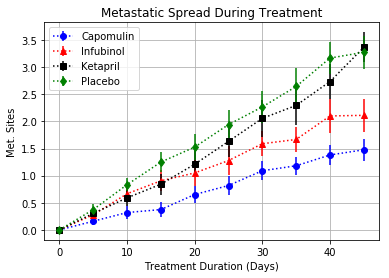

<Figure size 432x288 with 0 Axes>

In [12]:
x_axis = means.index
plt.figure()

# Generate the Plot (with Error Bars)
error = stderr["Metastatic Sites"]["Capomulin"]
c=plt.errorbar(x_axis, meansMeta_df["Capomulin"], yerr=error, fmt="o", ls="dotted", color="blue")

error = stderr["Metastatic Sites"]["Infubinol"]
i=plt.errorbar(x_axis, meansMeta_df["Infubinol"], yerr=error, fmt="^", ls="dotted", color="red")

error = stderr["Metastatic Sites"]["Ketapril"]
k=plt.errorbar(x_axis, meansMeta_df["Ketapril"], yerr=error, fmt="s", ls="dotted", color="black")

error = stderr["Metastatic Sites"]["Placebo"]
p=plt.errorbar(x_axis, meansMeta_df["Placebo"], yerr=error, fmt="d", ls="dotted", color="green")


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(linestyle="-")
plt.legend((c,i,k,p),("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

# Save the Figure
plt.savefig("metastatic.jpg")


Obversations: After 45 days, the metastatic spread taking Ketapril did not prove to be any more effective than the Placebo. 

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse=data_complete.loc[:,["Drug", "Timepoint", "Mouse ID"]]
mouse_count=mouse.groupby(["Drug", "Timepoint"])["Mouse ID"].count().to_frame()
mouse_count.head(10)

# Convert to DataFrame
mouse_count=pd.DataFrame(mouse_count.loc[:,["Mouse ID"]])

# Preview DataFrame
mouse_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice=mouse_count.unstack(0)
mouseCount_df=mice["Mouse ID"] #goes down a level

# Preview the Data Frame
mouseCount_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


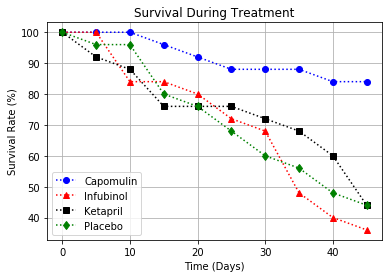

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = means.index
plt.figure()

# Generate the Plot (Accounting for percentages)
c=plt.errorbar(x_axis, (mouseCount_df["Capomulin"]/25*100), fmt="o", ls="dotted", color="blue")

i=plt.errorbar(x_axis, (mouseCount_df["Infubinol"]/25*100), fmt="^", ls="dotted", color="red")

k=plt.errorbar(x_axis, (mouseCount_df["Ketapril"]/25*100), fmt="s", ls="dotted", color="black")

p=plt.errorbar(x_axis, (mouseCount_df["Placebo"]/25*100), fmt="d", ls="dotted", color="green")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(linestyle="-")
plt.legend((c,i,k,p),("Capomulin", "Infubinol", "Ketapril", "Placebo"))
plt.show()

# Save the Figure
plt.savefig("mouse_count.jpg")


# Show the Figure
plt.show()

Observation: The survival rate of drug Capomulin was much higher than the other two drugs and the placebo. After 45 days, the other two drugs Infubinol and Ketapril had similiar survival rates as the placebo.

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug (the means of the tumor volume)
Capomulin_change = ((means_df["Capomulin"][45] - means_df["Capomulin"][0])/45)*100
Ceftamin_change = ((means_df["Ceftamin"][45] - means_df["Ceftamin"][0])/45)*100
Infubinol_change = ((means_df["Infubinol"][45] - means_df["Infubinol"][0])/45)*100
Ketapril_change = ((means_df["Ketapril"][45] - means_df["Ketapril"][0])/45)*100
Naftisol_change = ((means_df["Naftisol"][45] - means_df["Naftisol"][0])/45)*100   
Placebo_change = ((means_df["Placebo"][45] - means_df["Placebo"][0])/45)*100     
Propriva_change = ((means_df["Propriva"][45] - means_df["Propriva"][0])/45)*100     
Ramicane_change = ((means_df["Ramicane"][45] - means_df["Ramicane"][0])/45)*100    
Stelasyn_change = ((means_df["Stelasyn"][45] - means_df["Stelasyn"][0])/45)*100     
Zoniferol_change = ((means_df["Zoniferol"][45] - means_df["Zoniferol"][0])/45)*100

drug_change = pd.DataFrame({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                                        "Ramicane", "Stelasyn", "Zoniferol"], 
                            "Percent Change": [Capomulin_change, Ceftamin_change, Infubinol_change, Ketapril_change,
                                               Naftisol_change, Placebo_change, Propriva_change, Ramicane_change,
                                               Stelasyn_change,Zoniferol_change]})

# Display the data to confirm
drug_change

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


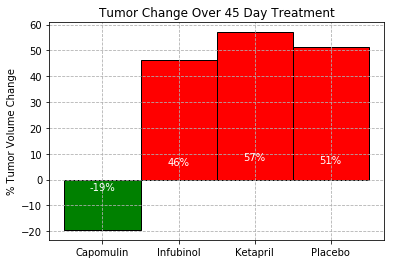

In [19]:
# Store all Relevant Percent Changes into a Tuple
percentage_tuple=(-19.475303, 46.123472, 57.028795, 51.297960)
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
#type(percentage_tuple)
x_axis = np.arange(len(percentage_tuple))

rects=plt.bar(x_axis, percentage_tuple, color=["red" if percentage_tuple[x] >0 else "green" for x in x_axis], align="center", width=1, ec="black")


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(np.arange(len(drugs)), drugs)
plt.grid(linestyle="dashed")


# Use functions to label the percentages of changes (https://matplotlib.org/examples/api/barchart_demo.html)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .15*height,
                '%d' % int(height) + '%',
                ha='center', va='center', color='white')
# Call functions to implement the function calls

autolabel(rects)

# Save the Figure
plt.savefig("tumor_change.jpg")

# Show the Figure
plt.show()

Observations: Drugs Infubinol and Ketapril and the placebo shows the volume of tumor increased at least 46%. Capomulin shows a decrease of tumor volume by 19% over a 45 day treatment.